# Black and White communities below poverty line
In this notebook, we wanted to explore where in Portland, Oregon there are high populations of whites and blacks living below the poverty line. We would be able to compare this with the distribution of stores that accept SNAP in the city to determine if there is an unjust access of basic needs resources for certain populations.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
white_poverty = gpd.read_file('white poverty.geojson')

In [3]:
black_poverty = gpd.read_file('black poverty.geojson')

In [4]:
white_poverty.shape

(163, 121)

In [5]:
black_poverty.shape

(163, 121)

In [6]:
white_poverty.head()

,geoid,name,B17001A001,"B17001A001, Error",B17001A002,"B17001A002, Error",B17001A003,"B17001A003, Error",B17001A004,"B17001A004, Error",...,"B17001A055, Error",B17001A056,"B17001A056, Error",B17001A057,"B17001A057, Error",B17001A058,"B17001A058, Error",B17001A059,"B17001A059, Error",geometry
0,14000US41005020100,"Census Tract 201, Clackamas, OR",3305.0,278.0,55.0,43.0,16.0,18.0,0.0,12.0,...,58.0,319.0,95.0,435.0,93.0,256.0,67.0,149.0,57.0,"MULTIPOLYGON (((-122.70784 45.42448, -122.7073..."
1,14000US41005020800,"Census Tract 208, Clackamas, OR",3647.0,299.0,317.0,130.0,94.0,68.0,5.0,9.0,...,68.0,111.0,65.0,216.0,77.0,242.0,84.0,180.0,78.0,"MULTIPOLYGON (((-122.66098 45.45782, -122.6593..."
2,14000US41005020900,"Census Tract 209, Clackamas, OR",3909.0,390.0,565.0,203.0,231.0,103.0,29.0,45.0,...,81.0,120.0,61.0,242.0,95.0,199.0,58.0,148.0,71.0,"MULTIPOLYGON (((-122.63656 45.46147, -122.6351..."
3,14000US41005021000,"Census Tract 210, Clackamas, OR",4083.0,339.0,576.0,209.0,238.0,112.0,0.0,12.0,...,88.0,315.0,103.0,175.0,69.0,206.0,64.0,82.0,48.0,"MULTIPOLYGON (((-122.62224 45.45027, -122.6222..."
4,14000US41005021601,"Census Tract 216.01, Clackamas, OR",5742.0,672.0,1040.0,543.0,621.0,344.0,45.0,70.0,...,115.0,313.0,150.0,328.0,161.0,371.0,157.0,142.0,77.0,"MULTIPOLYGON (((-122.60148 45.46130, -122.6014..."


In [7]:
list(white_poverty)

['geoid',
 'name',
 'B17001A001',
 'B17001A001, Error',
 'B17001A002',
 'B17001A002, Error',
 'B17001A003',
 'B17001A003, Error',
 'B17001A004',
 'B17001A004, Error',
 'B17001A005',
 'B17001A005, Error',
 'B17001A006',
 'B17001A006, Error',
 'B17001A007',
 'B17001A007, Error',
 'B17001A008',
 'B17001A008, Error',
 'B17001A009',
 'B17001A009, Error',
 'B17001A010',
 'B17001A010, Error',
 'B17001A011',
 'B17001A011, Error',
 'B17001A012',
 'B17001A012, Error',
 'B17001A013',
 'B17001A013, Error',
 'B17001A014',
 'B17001A014, Error',
 'B17001A015',
 'B17001A015, Error',
 'B17001A016',
 'B17001A016, Error',
 'B17001A017',
 'B17001A017, Error',
 'B17001A018',
 'B17001A018, Error',
 'B17001A019',
 'B17001A019, Error',
 'B17001A020',
 'B17001A020, Error',
 'B17001A021',
 'B17001A021, Error',
 'B17001A022',
 'B17001A022, Error',
 'B17001A023',
 'B17001A023, Error',
 'B17001A024',
 'B17001A024, Error',
 'B17001A025',
 'B17001A025, Error',
 'B17001A026',
 'B17001A026, Error',
 'B17001A027',
 'B1

In [8]:
columns_to_keep = ['geoid',
 'name',
 'B17001A001',
 'B17001A002',
 'B17001A031',
 'geometry']

In [9]:
white_poverty = white_poverty[columns_to_keep]

In [10]:
white_poverty.columns = ['geoid',
 'name',
 'Total',
 'Income in the past 12 months below poverty level',
 'Income in the past 12 months at or above poverty level',
 'geometry']

In [11]:
white_poverty.head()

,geoid,name,Total,Income in the past 12 months below poverty level,Income in the past 12 months at or above poverty level,geometry
0,14000US41005020100,"Census Tract 201, Clackamas, OR",3305.0,55.0,3250.0,"MULTIPOLYGON (((-122.70784 45.42448, -122.7073..."
1,14000US41005020800,"Census Tract 208, Clackamas, OR",3647.0,317.0,3330.0,"MULTIPOLYGON (((-122.66098 45.45782, -122.6593..."
2,14000US41005020900,"Census Tract 209, Clackamas, OR",3909.0,565.0,3344.0,"MULTIPOLYGON (((-122.63656 45.46147, -122.6351..."
3,14000US41005021000,"Census Tract 210, Clackamas, OR",4083.0,576.0,3507.0,"MULTIPOLYGON (((-122.62224 45.45027, -122.6222..."
4,14000US41005021601,"Census Tract 216.01, Clackamas, OR",5742.0,1040.0,4702.0,"MULTIPOLYGON (((-122.60148 45.46130, -122.6014..."


In [12]:
white_poverty['Percent Income below poverty level'] = white_poverty['Income in the past 12 months below poverty level'] / white_poverty['Total']*100
white_poverty['Percent Income at or above poverty level'] = white_poverty ['Income in the past 12 months at or above poverty level'] / white_poverty['Total']*100

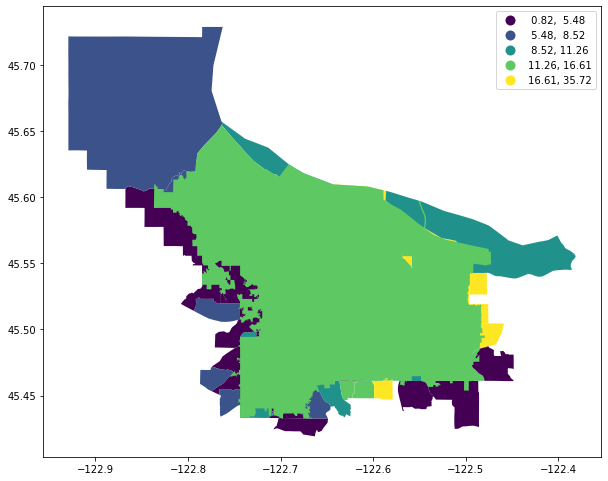

In [13]:
white_poverty.plot(figsize=(10,10),
         column='Percent Income below poverty level',
         legend=True,
         scheme='quantiles')

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


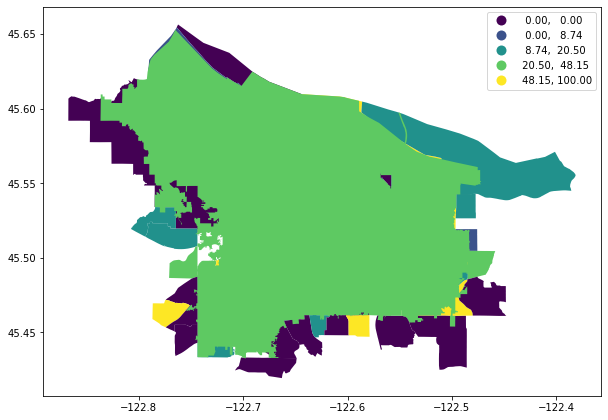

In [15]:
b_columns_to_keep = ['geoid',
 'name',
 'B17001B001',
 'B17001B002',
 'B17001B031',
 'geometry']

black_poverty = black_poverty[b_columns_to_keep]

black_poverty.columns = ['geoid',
 'name',
 'Total',
 'Income in the past 12 months below poverty level',
 'Income in the past 12 months at or above poverty level',
 'geometry']

black_poverty['Percent Income below poverty level'] = black_poverty['Income in the past 12 months below poverty level'] / black_poverty['Total']*100
black_poverty['Percent Income at or above poverty level'] = black_poverty ['Income in the past 12 months at or above poverty level'] / black_poverty['Total']*100

black_poverty.plot(figsize=(10,10),
         column='Percent Income below poverty level',
         legend=True,
         scheme='quantiles')

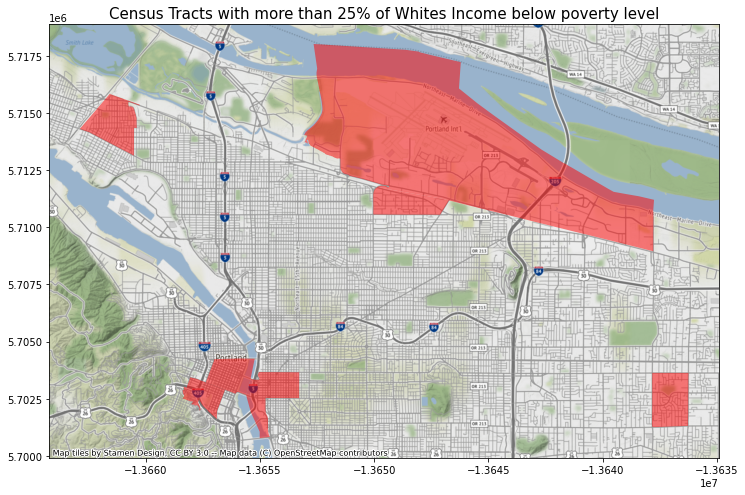

In [20]:
white_poverty_web_mercator = white_poverty.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12,12))

white_poverty_web_mercator[white_poverty_web_mercator['Percent Income below poverty level'] > 25].plot(ax=ax, alpha=.5, color="red")

ax.set_title("Census Tracts with more than 25% of Whites Income below poverty level", fontsize=15)

ctx.add_basemap(ax)

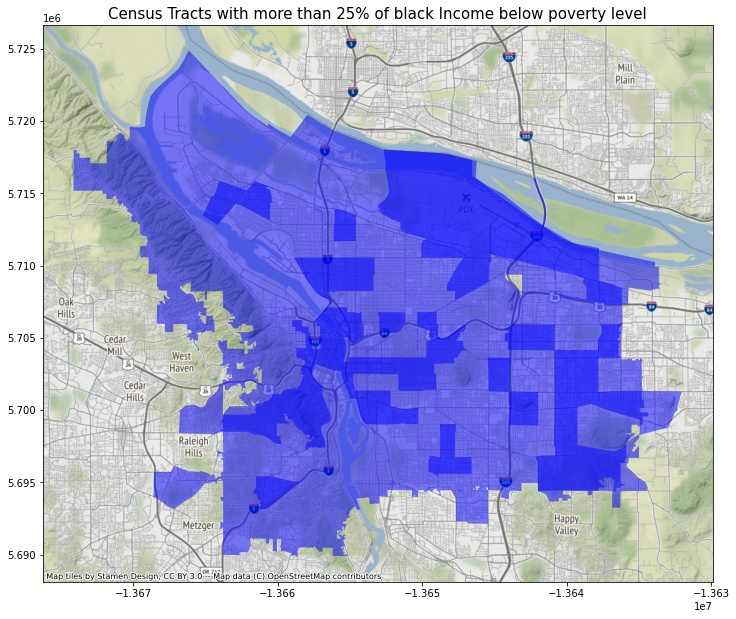

In [19]:
black_poverty_web_mercator = black_poverty.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12,12))

black_poverty_web_mercator[black_poverty_web_mercator['Percent Income below poverty level'] > 25].plot(ax=ax, alpha=.5, color="blue")

ax.set_title("Census Tracts with more than 25% of black Income below poverty level", fontsize=15)

ctx.add_basemap(ax)